In [1]:
!git clone https://github.com/phuockhanhle/SY09_pokemon.git
%cd SY09_pokemon

Cloning into 'SY09_pokemon'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 84 (delta 21), reused 65 (delta 9), pack-reused 0
Unpacking objects: 100% (84/84), done.
/content/SY09_pokemon


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import KFold,train_test_split

In [4]:
df = pd.read_csv("presenation/Original.csv")
from presenation.traitement import onehotencoding
from presenation.traitement import Differ
df_avecDiff = onehotencoding(df)
df_avecDiff = Differ(df_avecDiff)
X_avecDiff = df_avecDiff.drop(columns=['winner'])
varQuan_avecDiff = df_avecDiff.iloc[:,-6:]
df_avecDiff.loc[df_avecDiff['winner']=='t','winner']=1
df_avecDiff.loc[df_avecDiff['winner']=='f','winner']=0
y = df_avecDiff['winner']

/content/SY09_pokemon/presenation/traitement.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dif'+str(X.columns[i])[2:]] = X.iloc[:,i] - X.iloc[:,i+6]


In [0]:
df = pd.read_csv("presenation/Original.csv")
df_sansDiff = onehotencoding(df)
X_sansDiff = df_sansDiff.drop(columns=['winner'])
df_sansDiff.loc[df_sansDiff['winner']=='t','winner']=1
df_sansDiff.loc[df_sansDiff['winner']=='f','winner']=0
y = df_sansDiff['winner']
varQuan_sansDiff = X_sansDiff.iloc[:,0:13]
varQuan_sansDiff = varQuan_sansDiff.drop(columns=['p1_legen'])

In [0]:
df_traitQuali = pd.read_csv("presenation/traiteQuali_diff.csv")
df_traitQuali = df_traitQuali.drop(columns=['Unnamed: 0'])

In [7]:
X_traitQuali = df_traitQuali.drop(columns=['winner'])
df_traitQuali.loc[df_traitQuali['winner']=='t','winner']=1
df_traitQuali.loc[df_traitQuali['winner']=='f','winner']=0
y = df_traitQuali['winner']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_avecDiff,y,test_size=0.2,random_state =1)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [23]:
cls_avecDiff = DecisionTreeClassifier()
cls_avecDiff.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import cross_val_score

In [25]:
print("depth : ",cls_avecDiff.get_depth())
print("leaves : ",cls_avecDiff.get_n_leaves())
print("accuracy : ",accuracy_score(y_test,cls_avecDiff.predict(X_test)))
print("f1 score : ",f1_score(y_test,cls_avecDiff.predict(X_test)))

depth :  23
leaves :  1565
accuracy :  0.9397
f1 score :  0.9360890302066773


[Text(192.98088088213547, 212.91, 'X[55] <= 0.5\ngini = 0.498\nsamples = 40000\nvalue = [21119, 18881]'),
 Text(100.18883790702446, 203.85, 'X[51] <= 36.5\ngini = 0.083\nsamples = 20548\nvalue = [19657, 891]'),
 Text(69.74140259640096, 194.79, 'X[51] <= 18.5\ngini = 0.051\nsamples = 18081\nvalue = [17603, 478]'),
 Text(49.30403211032518, 185.73, 'X[55] <= -42.5\ngini = 0.038\nsamples = 15832\nvalue = [15524, 308]'),
 Text(31.930883415602263, 176.67, 'X[51] <= 1.5\ngini = 0.068\nsamples = 5386\nvalue = [5196, 190]'),
 Text(21.634816548776147, 167.60999999999999, 'X[3] <= 0.5\ngini = 0.046\nsamples = 4720\nvalue = [4608, 112]'),
 Text(17.427455091343955, 158.55, 'X[18] <= 0.5\ngini = 0.039\nsamples = 4557\nvalue = [4467, 90]'),
 Text(12.81545773751972, 149.49, 'X[50] <= 33.5\ngini = 0.031\nsamples = 4202\nvalue = [4135, 67]'),
 Text(10.583571319525724, 140.43, 'X[10] <= 0.5\ngini = 0.025\nsamples = 3946\nvalue = [3896, 50]'),
 Text(7.864418095771208, 131.37, 'X[22] <= 0.5\ngini = 0.02\ns

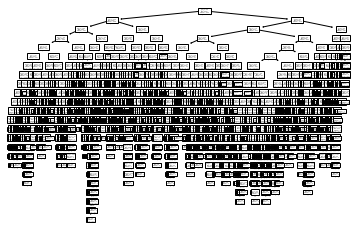

In [26]:
plot_tree(cls_avecDiff)

In [0]:
X_train.columns[55]

'dif_sp'

In [0]:
X_train.columns[51]

'dif_atk'

les deux premier etages de l'arbre est varibale dif_sp et dif_atk, il nous montre que ces deux stats influence essentiellement le resultat. Cela est coherente avec notre hypothese dans l'analyse des variables quantatives avec la representation Difference de stats

In [0]:
d = pd.concat([X_train,y_train],axis=1,sort=False)

In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
#optimiser le modele par bagging
from sklearn.utils import resample
df_ = []
X_ = []
y_ = []
cls_tree = []
n = 3
for i in range(n):
  df_.append(resample(d,n_samples = d.shape[0]))
  X_.append(df_[i].iloc[:,:-1])
  y_.append(df_[i].iloc[:,-1])
  cls_tree.append(DecisionTreeClassifier().fit(X_[i],y_[i]))


In [0]:
Vote_cls = VotingClassifier(estimators=[('tree_'+str(i+1),cls_tree[i]) for i in range(n)])

In [0]:
Vote_cls.fit(X_train,y_train)

VotingClassifier(estimators=[('tree_1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,

In [0]:

print("accuracy : ",accuracy_score(y_test,Vote_cls.predict(X_test)))
print("f1 score : ",f1_score(y_test,Vote_cls.predict(X_test)))

accuracy :  0.9399
f1 score :  0.9363145067288333


augement seulemet un peu

In [0]:
df_ = []
X_ = []
y_ = []
cls_tree = []
n = 4
for i in range(n):
  df_.append(resample(d,n_samples = d.shape[0]))
  X_.append(df_[i].iloc[:,:-1])
  y_.append(df_[i].iloc[:,-1])
  cls_tree.append(DecisionTreeClassifier().fit(X_[i],y_[i]))
Vote_cls = VotingClassifier(estimators=[('tree_'+str(i+1),cls_tree[i]) for i in range(n)])
Vote_cls.fit(X_train,y_train)

print("accuracy : ",accuracy_score(y_test,Vote_cls.predict(X_test)))
print("f1 score : ",f1_score(y_test,Vote_cls.predict(X_test)))

accuracy :  0.9406
f1 score :  0.9366737739872069


In [0]:
df_ = []
X_ = []
y_ = []
cls_tree = []
n = 5
for i in range(n):
  df_.append(resample(d,n_samples = d.shape[0]))
  X_.append(df_[i].iloc[:,:-1])
  y_.append(df_[i].iloc[:,-1])
  cls_tree.append(DecisionTreeClassifier().fit(X_[i],y_[i]))
Vote_cls = VotingClassifier(estimators=[('tree_'+str(i+1),cls_tree[i]) for i in range(n)])
Vote_cls.fit(X_train,y_train)

print("accuracy : ",accuracy_score(y_test,Vote_cls.predict(X_test)))
print("f1 score : ",f1_score(y_test,Vote_cls.predict(X_test)))

accuracy :  0.9409
f1 score :  0.9373874351096515


In [0]:
df_ = []
X_ = []
y_ = []
cls_tree = []
n = 6
for i in range(n):
  df_.append(resample(d,n_samples = d.shape[0]))
  X_.append(df_[i].iloc[:,:-1])
  y_.append(df_[i].iloc[:,-1])
  cls_tree.append(DecisionTreeClassifier().fit(X_[i],y_[i]))
Vote_cls = VotingClassifier(estimators=[('tree_'+str(i+1),cls_tree[i]) for i in range(n)])
Vote_cls.fit(X_train,y_train)

print("accuracy : ",accuracy_score(y_test,Vote_cls.predict(X_test)))
print("f1 score : ",f1_score(y_test,Vote_cls.predict(X_test)))

accuracy :  0.9386
f1 score :  0.9347918436703483


avec nbr de tree = 6, accuracy commence à diminuer, cela pose la overfitting

range(1, 10)

In [0]:
#optimise par random forest
from sklearn.ensemble import RandomForestClassifier
acc = []
f1 = []
for i in range (1,30):
  cls = RandomForestClassifier(n_estimators=i*5)
  cls.fit(X_train,y_train)
  acc.append(accuracy_score(y_test,cls.predict(X_test)))
  f1.append(f1_score(y_test,cls.predict(X_test)))



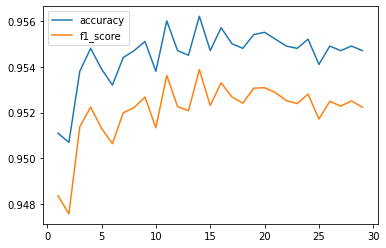

In [0]:
sns.lineplot(x=range(1,30),y=acc,label='accuracy')
sns.lineplot(x=range(1,30),y=f1,label='f1_score')

on trouve que accuracy et f1_score prend la maxima entre 10 et 15, puis, il commence de diminuer, on peut trouve que le nombre de tree optimal est entre 10 et 15

In [0]:
from sklearn.ensemble import RandomForestClassifier
acc = []
f1 = []
for i in range (1,100):
  cls = RandomForestClassifier(n_estimators=i*10)
  cls.fit(X_train,y_train)
  acc.append(accuracy_score(y_test,cls.predict(X_test)))
  f1.append(f1_score(y_test,cls.predict(X_test)))

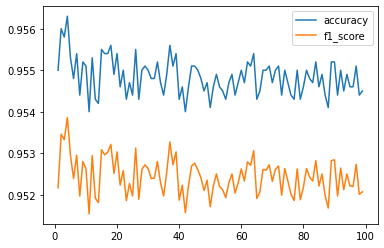

In [0]:
sns.lineplot(x=range(1,100),y=acc,label='accuracy')
sns.lineplot(x=range(1,100),y=f1,label='f1_score')

In [0]:
#regularisation par alpha
lambdas = cls_avecDiff.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']
lambdas_ = [(lambdas[i]*lambdas[i+1])**1/2 for i in range(len(lambdas)-1)]

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.utils import check_X_y
def decision_tree_cross_validation_accuracies(X, y, n_folds, lambdas):
  X, y = check_X_y(X, y)
  # Création d'un object `KFold` pour la validation croisée
  kf = KFold(n_splits = n_folds).split(X)
  for train_index, val_index in kf:
    # Création de `X_train`, `y_train`, `X_val` et `y_val`
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = y[train_index], y[val_index]
    for k, lmb in enumerate(lambdas):
      # Création d'un arbre avec un coefficient coût-complexité égal à `lmb
      cls = DecisionTreeClassifier(ccp_alpha=lmb)
      # Apprentissage sur l'ensemble d'apprentissage et calcul de la précision sur l'ensemble de validation
      cls.fit(X_train,y_train)
      acc = accuracy_score(y_test,cls.predict(X_test))
      yield k,acc

In [0]:
gen = decision_tree_cross_validation_accuracies(X_train,y_train,5,lambdas_)

In [0]:
df = pd.DataFrame(gen,columns=['k','acc'])

In [0]:
df

,k,acc
0,0,0.942250
1,1,0.941750
2,2,0.945250
3,3,0.941625
4,4,0.945000
...,...,...
3805,757,0.944000
3806,758,0.945375
3807,759,0.945500
3808,760,0.945375


In [0]:
k_opt = df.acc.argmax()

In [0]:
k_opt = df['k'][k_opt]

In [0]:
k_opt

761

In [0]:
len(lambdas_)

762

In [34]:
cls_opt = DecisionTreeClassifier(ccp_alpha=0.0007165424111743588)
cls_opt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0007165424111743588, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

[Text(139.5, 199.32, 'X[55] <= 0.5\ngini = 0.498\nsamples = 40000\nvalue = [21119, 18881]'),
 Text(44.64, 163.07999999999998, 'X[51] <= 36.5\ngini = 0.083\nsamples = 20548\nvalue = [19657, 891]'),
 Text(22.32, 126.83999999999999, 'gini = 0.051\nsamples = 18081\nvalue = [17603, 478]'),
 Text(66.96000000000001, 126.83999999999999, 'X[55] <= -33.5\ngini = 0.279\nsamples = 2467\nvalue = [2054, 413]'),
 Text(44.64, 90.6, 'gini = 0.486\nsamples = 656\nvalue = [383, 273]'),
 Text(89.28, 90.6, 'gini = 0.143\nsamples = 1811\nvalue = [1671, 140]'),
 Text(234.36, 163.07999999999998, 'X[28] <= 0.5\ngini = 0.139\nsamples = 19452\nvalue = [1462, 17990]'),
 Text(178.56, 126.83999999999999, 'X[51] <= -27.5\ngini = 0.111\nsamples = 18201\nvalue = [1074, 17127]'),
 Text(133.92000000000002, 90.6, 'X[55] <= 34.5\ngini = 0.305\nsamples = 2899\nvalue = [544, 2355]'),
 Text(111.6, 54.359999999999985, 'gini = 0.185\nsamples = 2011\nvalue = [208, 1803]'),
 Text(156.24, 54.359999999999985, 'gini = 0.47\nsamples

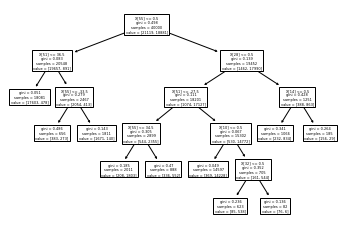

In [35]:
plot_tree(cls_opt)

In [36]:
print("depth : ",cls_opt.get_depth())
print("leaves : ",cls_opt.get_n_leaves())
print("accuracy : ",accuracy_score(y_test,cls_opt.predict(X_test)))
print("f1 score : ",f1_score(y_test,cls_opt.predict(X_test)))

depth :  5
leaves :  10
accuracy :  0.9435
f1 score :  0.9406699569463404


In [0]:
#applique cette alpha_opt sur bagging
df_ = []
X_ = []
y_ = []
cls_tree = []
n = 6
for i in range(n):
  df_.append(resample(d,n_samples = d.shape[0]))
  X_.append(df_[i].iloc[:,:-1])
  y_.append(df_[i].iloc[:,-1])
  cls_tree.append(DecisionTreeClassifier(ccp_alpha=lambdas_[k_opt]).fit(X_[i],y_[i]))
Vote_cls = VotingClassifier(estimators=[('tree_'+str(i+1),cls_tree[i]) for i in range(n)])
Vote_cls.fit(X_train,y_train)

print("accuracy : ",accuracy_score(y_test,Vote_cls.predict(X_test)))
print("f1 score : ",f1_score(y_test,Vote_cls.predict(X_test)))

accuracy :  0.9333
f1 score :  0.9303394255874673


In [0]:
#applique cette alpha_opt sur bagging
df_ = []
X_ = []
y_ = []
cls_tree = []
n = 7
for i in range(n):
  df_.append(resample(d,n_samples = d.shape[0]))
  X_.append(df_[i].iloc[:,:-1])
  y_.append(df_[i].iloc[:,-1])
  cls_tree.append(DecisionTreeClassifier(ccp_alpha=lambdas_[k_opt]).fit(X_[i],y_[i]))
Vote_cls = VotingClassifier(estimators=[('tree_'+str(i+1),cls_tree[i]) for i in range(n)])
Vote_cls.fit(X_train,y_train)

print("accuracy : ",accuracy_score(y_test,Vote_cls.predict(X_test)))
print("f1 score : ",f1_score(y_test,Vote_cls.predict(X_test)))

accuracy :  0.9333
f1 score :  0.9303394255874673


In [0]:
df_ = []
X_ = []
y_ = []
cls_tree = []
n = 8
for i in range(n):
  df_.append(resample(d,n_samples = d.shape[0]))
  X_.append(df_[i].iloc[:,:-1])
  y_.append(df_[i].iloc[:,-1])
  cls_tree.append(DecisionTreeClassifier(ccp_alpha=lambdas_[k_opt]).fit(X_[i],y_[i]))
Vote_cls = VotingClassifier(estimators=[('tree_'+str(i+1),cls_tree[i]) for i in range(n)])
Vote_cls.fit(X_train,y_train)

print("accuracy : ",accuracy_score(y_test,Vote_cls.predict(X_test)))
print("f1 score : ",f1_score(y_test,Vote_cls.predict(X_test)))

accuracy :  0.9333
f1 score :  0.9303394255874673


en augementant le nombre d'arbres, l'accuracy ne change pas, parce que alpha permet chaque arbre devient le même

on trouve que le tree construit par k_opt est tres simple avec un meme accuracy. la raison est que il y a des variables qui dicide essentilement le resultat. Ici, on peut voir ces variables sont 55,51,28,32,14

In [0]:
X_train.columns[[55,51,28,32,14]]

Index(['dif_sp', 'dif_atk', 'p2_Ghost', 'p2_Normal', 'p1_Normal'], dtype='object')

il peut etre avoir hypothese que notre data ou notre representation est biasé, c'est à dire que si il y a une nouvelle donnée tel que ces 5 variables sont environ mean de chaque ces variables, il peut etre faux

on essaie sur des differant representation

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_sansDiff,y,test_size=0.2,random_state =1)

In [0]:
cls_sansDiff = DecisionTreeClassifier()
cls_sansDiff.fit(X_train,y_train)
print("depth : ",cls_sansDiff.get_depth())
print("leaves : ",cls_sansDiff.get_n_leaves())
print("accuracy : ",accuracy_score(y_test,cls_sansDiff.predict(X_test)))
print("f1 score : ",f1_score(y_test,cls_sansDiff.predict(X_test)))

depth :  26
leaves :  1934
accuracy :  0.9382
f1 score :  0.9345061466723189


l'arbre de vient plus complexe avec moins accuracy et f1_score

In [0]:
from sklearn.metrics import accuracy_score,f1_score

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_traitQuali,y,test_size=0.2,random_state =1)

In [40]:
cls_traitQuali = DecisionTreeClassifier()
cls_traitQuali.fit(X_train,y_train)
print("depth : ",cls_traitQuali.get_depth())
print("leaves : ",cls_traitQuali.get_n_leaves())
print("accuracy : ",accuracy_score(y_test,cls_traitQuali.predict(X_test)))
print("f1 score : ",f1_score(y_test,cls_traitQuali.predict(X_test)))

depth :  30
leaves :  2012
accuracy :  0.9326
f1 score :  0.9286319356204998


[Text(154.55556291604972, 213.93290322580646, 'X[5] <= 0.5\ngini = 0.498\nsamples = 40000\nvalue = [21119, 18881]'),
 Text(93.59780701476258, 206.91870967741934, 'X[1] <= 36.5\ngini = 0.083\nsamples = 20548\nvalue = [19657, 891]'),
 Text(66.17200404575892, 199.90451612903226, 'X[1] <= 18.5\ngini = 0.051\nsamples = 18081\nvalue = [17603, 478]'),
 Text(50.91587231128247, 192.89032258064515, 'X[7] <= 0.758\ngini = 0.038\nsamples = 15832\nvalue = [15524, 308]'),
 Text(37.96973163555195, 185.87612903225806, 'X[0] <= 33.5\ngini = 0.027\nsamples = 14367\nvalue = [14172, 195]'),
 Text(21.948320819805197, 178.86193548387098, 'X[5] <= -43.5\ngini = 0.022\nsamples = 13378\nvalue = [13230, 148]'),
 Text(11.084560166396104, 171.84774193548387, 'X[1] <= -6.5\ngini = 0.038\nsamples = 4559\nvalue = [4471, 88]'),
 Text(4.727374188311688, 164.83354838709678, 'X[2] <= 29.5\ngini = 0.017\nsamples = 3651\nvalue = [3619, 32]'),
 Text(1.33612012987013, 157.81935483870967, 'X[1] <= -147.5\ngini = 0.01\nsample

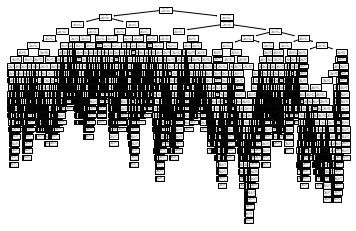

In [41]:
plot_tree(cls_traitQuali)

meme avec representation au dessus

In [0]:
lambdas = cls_traitQuali.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']
lambdas_ = [(lambdas[i]*lambdas[i+1])**1/2 for i in range(len(lambdas)-1)]

In [0]:
gen = decision_tree_cross_validation_accuracies(X_train,y_train,5,lambdas_)

In [0]:
df = pd.DataFrame(gen,columns=['k','acc'])

In [0]:
k_opt = df.acc.argmax()

In [0]:
k_opt = df['k'][k_opt]

In [0]:
cls_opt_traitQuali = DecisionTreeClassifier(ccp_alpha=lambdas_[k_opt])

In [50]:
cls_opt_traitQuali.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001525089292729209, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

[Text(125.55000000000001, 201.90857142857143, 'X[5] <= 0.5\ngini = 0.498\nsamples = 40000\nvalue = [21119, 18881]'),
 Text(55.800000000000004, 170.84571428571428, 'X[1] <= 36.5\ngini = 0.083\nsamples = 20548\nvalue = [19657, 891]'),
 Text(27.900000000000002, 139.78285714285715, 'gini = 0.051\nsamples = 18081\nvalue = [17603, 478]'),
 Text(83.7, 139.78285714285715, 'X[5] <= -33.5\ngini = 0.279\nsamples = 2467\nvalue = [2054, 413]'),
 Text(55.800000000000004, 108.72, 'gini = 0.486\nsamples = 656\nvalue = [383, 273]'),
 Text(111.60000000000001, 108.72, 'gini = 0.143\nsamples = 1811\nvalue = [1671, 140]'),
 Text(195.3, 170.84571428571428, 'X[7] <= 0.156\ngini = 0.139\nsamples = 19452\nvalue = [1462, 17990]'),
 Text(167.4, 139.78285714285715, 'gini = 0.0\nsamples = 182\nvalue = [182, 0]'),
 Text(223.20000000000002, 139.78285714285715, 'X[1] <= -32.5\ngini = 0.124\nsamples = 19270\nvalue = [1280, 17990]'),
 Text(167.4, 108.72, 'X[5] <= 35.5\ngini = 0.329\nsamples = 2592\nvalue = [539, 2053]'

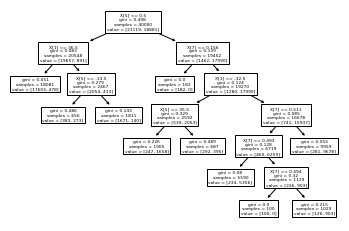

In [51]:
plot_tree(cls_opt_traitQuali)

In [53]:
X_train.columns[[5,1,7]]

Index(['dif_sp', 'dif_atk', 'probWinParType'], dtype='object')

In [54]:
X_avecDiff.columns

Index(['p1_legen', 'p2_legen', 'p1_Bug', 'p1_Dark', 'p1_Dragon', 'p1_Electric',
       'p1_Fairy', 'p1_Fighting', 'p1_Fire', 'p1_Flying', 'p1_Ghost',
       'p1_Grass', 'p1_Ground', 'p1_Ice', 'p1_Normal', 'p1_Poison',
       'p1_Psychic', 'p1_Rock', 'p1_Steel', 'p1_Water', 'p2_Bug', 'p2_Dark',
       'p2_Dragon', 'p2_Electric', 'p2_Fairy', 'p2_Fighting', 'p2_Fire',
       'p2_Flying', 'p2_Ghost', 'p2_Grass', 'p2_Ground', 'p2_Ice', 'p2_Normal',
       'p2_Poison', 'p2_Psychic', 'p2_Rock', 'p2_Steel', 'p2_Water',
       'category_1_x', 'category_2_x', 'category_3_x', 'category_4_x',
       'category_5_x', 'category_6_x', 'category_1_y', 'category_2_y',
       'category_3_y', 'category_4_y', 'category_5_y', 'category_6_y',
       'dif_hp', 'dif_atk', 'dif_def', 'dif_spatk', 'dif_spdef', 'dif_sp'],
      dtype='object')

In [55]:
X_sansDiff.columns

Index(['p1_hp', 'p1_atk', 'p1_def', 'p1_spatk', 'p1_spdef', 'p1_sp',
       'p1_legen', 'p2_hp', 'p2_atk', 'p2_def', 'p2_spatk', 'p2_spdef',
       'p2_sp', 'p2_legen', 'p1_Bug', 'p1_Dark', 'p1_Dragon', 'p1_Electric',
       'p1_Fairy', 'p1_Fighting', 'p1_Fire', 'p1_Flying', 'p1_Ghost',
       'p1_Grass', 'p1_Ground', 'p1_Ice', 'p1_Normal', 'p1_Poison',
       'p1_Psychic', 'p1_Rock', 'p1_Steel', 'p1_Water', 'p2_Bug', 'p2_Dark',
       'p2_Dragon', 'p2_Electric', 'p2_Fairy', 'p2_Fighting', 'p2_Fire',
       'p2_Flying', 'p2_Ghost', 'p2_Grass', 'p2_Ground', 'p2_Ice', 'p2_Normal',
       'p2_Poison', 'p2_Psychic', 'p2_Rock', 'p2_Steel', 'p2_Water',
       'category_1_x', 'category_2_x', 'category_3_x', 'category_4_x',
       'category_5_x', 'category_6_x', 'category_1_y', 'category_2_y',
       'category_3_y', 'category_4_y', 'category_5_y', 'category_6_y'],
      dtype='object')

In [56]:
X_traitQuali

,dif_hp,dif_atk,dif_def,dif_spatk,dif_spdef,dif_sp,nbrContre,probWinParType
0,-20,-6,10,-15,10,-19,482.0,0.431535
1,0,-39,-18,18,39,0,482.0,0.568465
2,-20,-35,10,-45,10,0,138.0,0.268116
3,-37,-80,-50,10,-50,-28,252.0,0.432540
4,50,50,-105,105,-160,50,487.0,0.542094
...,...,...,...,...,...,...,...,...
49995,70,80,30,80,95,30,584.0,0.715753
49996,25,30,0,-15,5,8,218.0,0.903670
49997,-13,-65,40,25,10,-25,1702.0,0.394242
49998,15,-5,-20,-40,0,55,134.0,1.000000
